<a href="https://colab.research.google.com/github/Ansalnakhan/Advanced-computing-lab/blob/main/EXPERIMENT5/LDA%20KAGGLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

In [38]:
file=pd.read_csv("/content/BreastCancer.csv")

In [64]:
x=file[["Cl.thickness","Cell.size","Cell.shape","Marg.adhesion",	"Epith.c.size","Bare.nuclei",	"Bl.cromatin","Normal.nucleoli","Mitoses"]]


In [65]:
y=file["Class"]

In [66]:
file

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,0
695,2,1,1,1,2,1.0,1,1,1,0
696,5,10,10,3,7,3.0,8,10,2,1
697,4,8,6,4,3,4.0,10,6,1,1


In [67]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x["Bare.nuclei"]=le.fit_transform(x["Bare.nuclei"])
x=x.fillna(0)
x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
0,5,1,1,1,2,0,3,1,1
1,5,4,4,5,7,9,3,2,1
2,3,1,1,1,2,1,3,1,1
3,6,8,8,1,3,3,3,7,1
4,4,1,1,3,2,0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,1,1,1,1
695,2,1,1,1,2,0,1,1,1
696,5,10,10,3,7,2,8,10,2
697,4,8,6,4,3,3,10,6,1


In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [69]:
ml = LinearDiscriminantAnalysis()

In [70]:
new=ml.fit_transform(x,y)

In [71]:
new

array([[-1.27754930e+00],
       [ 1.62639973e+00],
       [-1.49966640e+00],
       [ 1.64747543e+00],
       [-1.35183492e+00],
       [ 5.03651555e+00],
       [-4.73914412e-01],
       [-1.77180833e+00],
       [-2.08596664e+00],
       [-1.49008418e+00],
       [-2.13313898e+00],
       [-2.01201884e+00],
       [ 6.45880935e-02],
       [-1.72178350e+00],
       [ 3.41725787e+00],
       [ 7.41156437e-01],
       [-1.61163473e+00],
       [-1.47774136e+00],
       [ 3.26830897e+00],
       [-1.07735725e+00],
       [ 2.39051358e+00],
       [ 3.39545409e+00],
       [-1.81182679e+00],
       [ 2.61123614e+00],
       [-2.07831752e+00],
       [ 7.65210896e-01],
       [-1.74509769e+00],
       [-1.41144267e+00],
       [-2.01201884e+00],
       [-2.13346999e+00],
       [-1.86664824e+00],
       [-1.87812547e+00],
       [ 3.09413476e+00],
       [-1.81517225e+00],
       [-1.70550965e+00],
       [-2.01201884e+00],
       [ 3.82382719e+00],
       [-4.75054656e-01],
       [ 2.2

In [74]:
newx=pd.DataFrame(data=new,columns=["LD1"])

In [76]:
xaxis=newx["LD1"]


In [32]:
newx

,LD1,LD2
0,8.084953,0.328454
1,7.147163,-0.755473
2,7.511378,-0.238078
3,6.837676,-0.642885
4,8.157814,0.540639
...,...,...
145,-5.674013,1.661346
146,-5.197129,-0.365506
147,-4.981712,0.812973
148,-5.901486,2.320751


In [77]:
print(ml.predict)


<bound method LinearClassifierMixin.predict of LinearDiscriminantAnalysis()>


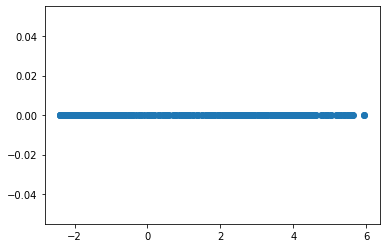

In [80]:
import matplotlib.pyplot as plt
y=[0 for item in range(0,699)]
fig = plt.figure()
plt.scatter(xaxis,y)

In [81]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(newx)


In [82]:
centers=kmeans.cluster_centers_
labels= kmeans.labels_
labels

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,

ValueError: ignored

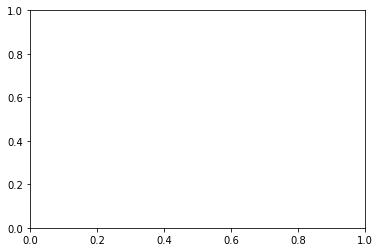

In [83]:
plt.scatter(xaxis,yaxis,c=labels,cmap='rainbow')